In [24]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Fish_Classification_Dataset.csv")

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,102.30,17.76,19.34,21.48,5.74,3.16
1,Bream,997.50,39.90,43.05,48.83,18.50,6.69
2,Roach,62.79,15.02,16.56,18.47,4.82,2.57
3,Parkki,272.00,30.40,33.12,37.12,15.03,5.46
4,Perch,153.00,20.91,22.95,24.48,6.93,3.70


In [4]:
y = data["Species"]
x = data.drop(columns = "Species" )
x.head() ,y.head()

(   Weight  Length1  Length2  Length3  Height  Width
 0  102.30    17.76    19.34    21.48    5.74   3.16
 1  997.50    39.90    43.05    48.83   18.50   6.69
 2   62.79    15.02    16.56    18.47    4.82   2.57
 3  272.00    30.40    33.12    37.12   15.03   5.46
 4  153.00    20.91    22.95    24.48    6.93   3.70,
 0     Roach
 1     Bream
 2     Roach
 3    Parkki
 4     Perch
 Name: Species, dtype: object)

In [5]:
y.unique()

array(['Roach', 'Bream', 'Parkki', 'Perch', 'Whitefish', 'Smelt', 'Pike'],
      dtype=object)

In [6]:
len(y.unique())

7

In [7]:
y.value_counts()

Perch        2000
Pike         2000
Whitefish    2000
Parkki       2000
Smelt        2000
Bream        2000
Roach        2000
Name: Species, dtype: int64

In [8]:
x_test = x.iloc[:3000]
y_test = y.iloc[:3000]

x_train = x.iloc[len(x_test):]
y_train = y.iloc[len(y_test):]

In [9]:
x_train.shape, y_train.shape

((11000, 6), (11000,))

In [10]:
x_test.shape, y_test.shape

((3000, 6), (3000,))

In [36]:
from sklearn.preprocessing import LabelEncoder

y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [37]:
y_train.shape, y_test.shape

((11000,), (3000,))

In [38]:
from tensorflow.keras import layers, Sequential

In [39]:
model = Sequential([
    
    layers.Dense(128, activation = 'relu', input_shape = (6,)),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),

    layers.Dense(7, activation = 'softmax')
                   ])

In [40]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", 
              metrics = ["accuracy"])

In [41]:
history = model.fit(x_train, y_train, epochs = 80, validation_split = 0.2)

Train on 8800 samples, validate on 2200 samples
Epoch 1/80
8800/8800 [==============================] - 1s 150us/sample - loss: 5.7054 - accuracy: 0.3624 - val_loss: 5.2437 - val_accuracy: 0.3882
Epoch 2/80
8800/8800 [==============================] - 1s 77us/sample - loss: 5.2588 - accuracy: 0.4222 - val_loss: 5.8543 - val_accuracy: 0.4105
Epoch 3/80
8800/8800 [==============================] - 1s 87us/sample - loss: 3.4916 - accuracy: 0.4845 - val_loss: 0.9754 - val_accuracy: 0.5609
Epoch 4/80
8800/8800 [==============================] - 1s 84us/sample - loss: 0.9660 - accuracy: 0.6435 - val_loss: 0.6435 - val_accuracy: 0.7209
Epoch 5/80
8800/8800 [==============================] - 1s 73us/sample - loss: 0.6107 - accuracy: 0.7581 - val_loss: 0.5699 - val_accuracy: 0.7950
Epoch 6/80
8800/8800 [==============================] - 1s 74us/sample - loss: 0.5539 - accuracy: 0.7714 - val_loss: 0.3882 - val_accuracy: 0.8118
Epoch 7/80
8800/8800 [==============================] - 1s 73us/sampl

Epoch 55/80
8800/8800 [==============================] - 1s 67us/sample - loss: 0.0825 - accuracy: 0.9714 - val_loss: 0.0387 - val_accuracy: 0.9877
Epoch 56/80
8800/8800 [==============================] - 1s 67us/sample - loss: 0.0457 - accuracy: 0.9845 - val_loss: 0.0335 - val_accuracy: 0.9900
Epoch 57/80
8800/8800 [==============================] - 1s 68us/sample - loss: 0.1043 - accuracy: 0.9643 - val_loss: 0.0429 - val_accuracy: 0.9864
Epoch 58/80
8800/8800 [==============================] - 1s 68us/sample - loss: 0.0528 - accuracy: 0.9826 - val_loss: 0.0378 - val_accuracy: 0.9900
Epoch 59/80
8800/8800 [==============================] - 1s 68us/sample - loss: 0.0590 - accuracy: 0.9798 - val_loss: 0.1460 - val_accuracy: 0.9336
Epoch 60/80
8800/8800 [==============================] - 1s 68us/sample - loss: 0.0489 - accuracy: 0.9847 - val_loss: 0.0378 - val_accuracy: 0.9900
Epoch 61/80
8800/8800 [==============================] - 1s 69us/sample - loss: 0.0638 - accuracy: 0.9781 - val_

In [47]:
evaluation = model.evaluate(x_test,y_test,verbose=2)

3000/3000 - 0s - loss: 0.0176 - accuracy: 0.9933


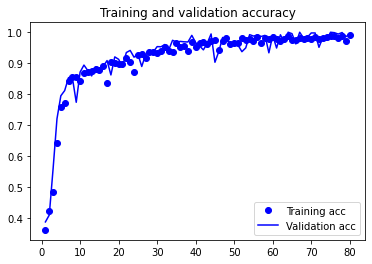

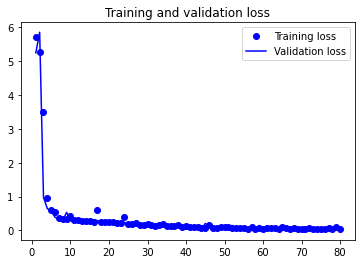

In [48]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [60]:
model.save("model.h5")

In [62]:
from tensorflow.keras.models import load_model

loaded_model = load_model("model.h5")

In [50]:
def find_max_index(prediction):
    
    a,d=0,0                                
    for i in prediction[0]:                
        if float(i)>a or float(i)==a:      
            a=i                            
            d=0                            
        elif float(i)<a:                   
            d=d+1    
    index = len(prediction[0])-d-1
    
    return index

In [51]:
labels = y.unique()
labels

array(['Roach', 'Bream', 'Parkki', 'Perch', 'Whitefish', 'Smelt', 'Pike'],
      dtype=object)

In [68]:
def predict(n, data, label):
    
    inp = np.array(data.iloc[n]).reshape((1,6))  
    prediction = loaded_model.predict(inp)
    
    max_index = find_max_index(prediction)
    
    print("Predicted: %s"%(labels[max_index]) + '\n' + "Actual   : %s"%(labels[label[n]]))

In [69]:
predict(9550,x_train,y_train)
print()
predict(850,x_test,y_test)

Predicted: Roach
Actual   : Roach

Predicted: Parkki
Actual   : Parkki


In [70]:
random = [50,754,68,7500,69,10000,456,8825,4569,147,9958,6214,897,1234]
for i in random:
    predict(i,x_train,y_train)
    print()

Predicted: Smelt
Actual   : Smelt

Predicted: Whitefish
Actual   : Whitefish

Predicted: Parkki
Actual   : Parkki

Predicted: Pike
Actual   : Pike

Predicted: Bream
Actual   : Bream

Predicted: Roach
Actual   : Roach

Predicted: Bream
Actual   : Bream

Predicted: Parkki
Actual   : Parkki

Predicted: Perch
Actual   : Perch

Predicted: Smelt
Actual   : Smelt

Predicted: Roach
Actual   : Roach

Predicted: Whitefish
Actual   : Whitefish

Predicted: Parkki
Actual   : Parkki

Predicted: Bream
Actual   : Bream

